<a href="https://colab.research.google.com/github/itimes-digital/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/desafio_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
dataset = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/estudo-python-git/master/machine-learning/dataset/cars.csv', sep=',')
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [89]:
dataset.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [90]:
dataset.nunique()

mpg            103
cylinders        5
cubicinches     75
hp              85
weightlbs      240
time-to-60      17
year            13
brand            3
dtype: int64

In [91]:
dataset.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [92]:
dataset['cubicinches'] = pd.to_numeric(dataset['cubicinches'], errors='coerce')

In [93]:
dataset['weightlbs'] = pd.to_numeric(dataset['weightlbs'], errors='coerce')

In [94]:
dataset.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [95]:
dataset.query("cubicinches == 'NaN'")

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,US.
180,19.8,6,NaN,85,2990.0,18,1980,US.


In [96]:
dataset['weightlbs'].mean()

3009.8333333333335

In [97]:
dataset['weightlbs'].fillna(dataset['weightlbs'].mean(), inplace=True)

In [99]:
dataset['cubicinches'].fillna(dataset['cubicinches'].mean(), inplace=True)

In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [101]:
dataset.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [102]:
dataset.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

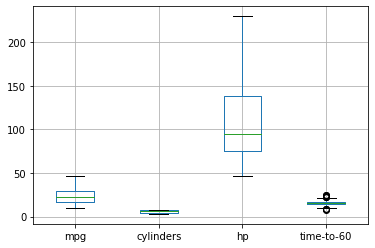

In [103]:
dataset[['mpg', 'cylinders', 'hp', 'time-to-60']].boxplot()

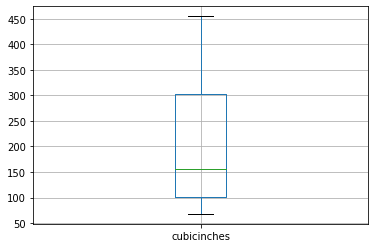

In [104]:
dataset[['cubicinches']].boxplot()

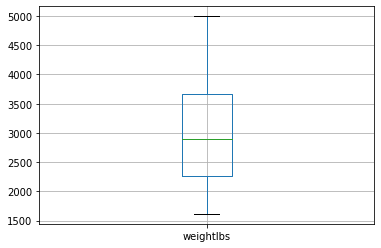

In [105]:
dataset[['weightlbs']].boxplot()

In [106]:
dataset[['cylinders', 'mpg']].corr()

,cylinders,mpg
cylinders,1.00000,-0.77671
mpg,-0.77671,1.00000


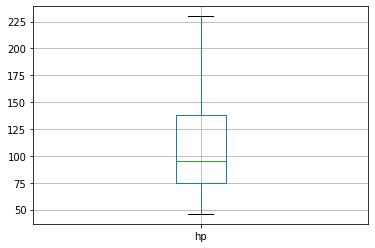

In [107]:
dataset[['hp']].boxplot()

In [108]:
dataset[['hp']].describe()

,hp
count,261.000000
mean,106.360153
std,40.499959
min,46.000000
25%,75.000000
50%,95.000000
75%,138.000000
max,230.000000


In [153]:
from sklearn.preprocessing import StandardScaler

normaliza = StandardScaler()
new_dataset = dataset.loc[:,'mpg':'year'].values
new_dataset

array([[1.400e+01, 8.000e+00, 3.500e+02, ..., 4.209e+03, 1.200e+01,
        1.972e+03],
       [3.190e+01, 4.000e+00, 8.900e+01, ..., 1.925e+03, 1.400e+01,
        1.980e+03],
       [1.700e+01, 8.000e+00, 3.020e+02, ..., 3.449e+03, 1.100e+01,
        1.971e+03],
       ...,
       [2.200e+01, 6.000e+00, 2.320e+02, ..., 2.835e+03, 1.500e+01,
        1.983e+03],
       [1.800e+01, 6.000e+00, 2.320e+02, ..., 3.288e+03, 1.600e+01,
        1.972e+03],
       [2.200e+01, 6.000e+00, 2.500e+02, ..., 3.353e+03, 1.500e+01,
        1.977e+03]])

In [154]:
new_dataset = normaliza.fit_transform(new_dataset)

In [150]:
dataset_hp = dataset.loc[:, 'hp'].values
dataset_hp

array([165,  71, 140, 150,  63, 125, 158, 215,  77,  62,  70,  78, 140,
       180,  90, 155,  65, 150,  95,  90,  65, 110,  81, 142,  60,  53,
        65, 148,  78,  65,  88, 100,  97,  90,  67, 110,  46, 110, 138,
        90, 105, 140, 110, 110, 225,  74, 150,  86,  78,  88, 150,  71,
       160,  75, 180, 230, 108,  83,  70, 175, 100,  94, 132,  65, 150,
        98,  46,  67,  71, 145,  95,  88,  92,  97,  83,  85,  90,  95,
        90,  75, 190, 198, 145,  95,  81,  69,  97,  85,  75,  82,  65,
        97, 175, 100,  79, 110, 180,  88, 135, 100, 150, 167,  80,  70,
        75,  84,  48,  76, 115, 130,  88, 112, 149,  53,  69,  95,  88,
       110,  65, 198,  83,  67, 170, 105,  60,  72, 170,  75,  91,  66,
        78,  90, 225, 150, 145, 150,  70, 129,  98,  87, 115,  75,  96,
        60, 125,  88, 110,  90, 165, 139,  75,  95, 225,  72,  86,  88,
        90,  68, 100, 133,  90, 140,  97,  95,  54, 110, 105,  92, 122,
        63,  72, 103,  49,  85,  86,  69, 175, 150, 139,  68,  8

In [151]:
dataset_hp = normaliza.fit_transform(np.reshape(dataset_hp, (1, -1)))
dataset_hp

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [152]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)

In [161]:
dataset_pca = pca.fit_transform(new_dataset)

In [162]:
print(pca.explained_variance_ratio_)

[0.72371349 0.12675138 0.09126131 0.02773591 0.01766794 0.00798425
 0.00488572]


In [157]:
print(pca.singular_values_)

[36.36240564 15.21758127 12.91256795  7.11853318  5.68148989  3.81932178
  2.9876755 ]


In [175]:
np.shape(dataset_pca)

(261, 7)

In [206]:
dataset_pca

array([[ 3.48521925,  0.5263255 , -0.13973834, ...,  0.08690179,
        -0.17920558,  0.07907785],
       [-2.17691231, -0.28542399, -1.3046126 , ..., -0.28969849,
        -0.04114712, -0.01312739],
       [ 2.6849731 ,  1.04694609, -0.73215552, ..., -0.53516815,
        -0.07574501,  0.15995575],
       ...,
       [-0.05384928, -1.58270559, -0.2851369 , ..., -0.30790924,
         0.49848823, -0.15274899],
       [ 0.78538633,  1.18244612,  0.60971526, ..., -0.20311094,
        -0.21777245, -0.1097028 ],
       [ 0.54934121, -0.22344808,  0.0834219 , ..., -0.1413986 ,
        -0.23267174, -0.22236514]])

In [207]:
dataset_kmeans = dataset_pca[:, :3]

In [208]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(dataset_kmeans)
kmeans.inertia_

508.2980434518751

In [212]:
kmeans = KMeans(n_clusters = 3, random_state = 42);
previsoes = kmeans.fit_predict(dataset_kmeans)

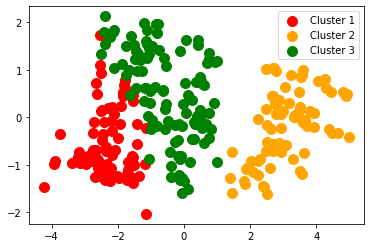

In [215]:
plt.scatter(dataset_kmeans[previsoes == 0, 0], dataset_kmeans[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataset_kmeans[previsoes == 1, 0], dataset_kmeans[previsoes == 1, 1], s = 100, c = 'orange' , label = 'Cluster 2')
plt.scatter(dataset_kmeans[previsoes == 2, 0], dataset_kmeans[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.legend()

In [218]:
len(dataset_kmeans[previsoes == 0, 0])

77

In [223]:
len(dataset_kmeans[previsoes == 2, 1])

109

In [221]:
len(dataset_kmeans[previsoes == 1, 1])

75

In [224]:
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [225]:
dataset_vehicle_efficiency = dataset.loc[:, 'cylinders' : 'time-to-60']

In [229]:
vehicle_efficiency_values = []

for index, row in dataset.iterrows(): 
  if row['mpg'] > 25:
    vehicle_efficiency_values.append(1) 
  else:
    vehicle_efficiency_values.append(0)


In [238]:
vehicle_efficiency_values[:5]

[0, 1, 0, 0, 1]

In [231]:
dataset_vehicle_efficiency['vehicle_efficiency'] = vehicle_efficiency_values

In [239]:
dataset_vehicle_efficiency.head()

,cylinders,cubicinches,hp,weightlbs,time-to-60,vehicle_efficiency
0,8,350.0,165,4209.0,12,0
1,4,89.0,71,1925.0,14,1
2,8,302.0,140,3449.0,11,0
3,8,400.0,150,3761.0,10,0
4,4,98.0,63,2051.0,17,1


In [240]:
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [243]:
entradas_arvore = normaliza.fit_transform(dataset_vehicle_efficiency.loc[:, 'cylinders': 'time-to-60'])

In [266]:
entradas_arvore

array([[ 1.39305285,  1.37239295,  1.45068065,  1.41499703, -1.22128734],
       [-0.91910482, -1.03028992, -0.87476849, -1.28008557, -0.53282946],
       [ 1.39305285,  0.93052024,  0.83221013,  0.51820947, -1.56551627],
       ...,
       [ 0.23697401,  0.28612253,  0.13952316, -0.20630047, -0.18860053],
       [ 0.23697401,  0.28612253, -0.15734269,  0.32823211,  0.15562841],
       [ 0.23697401,  0.4518248 , -0.03364859,  0.40493105, -0.18860053]])

In [270]:
np.shape(entradas_arvore)

(261, 5)

In [275]:
entradas_arvore_questao_10 = pd.DataFrame(entradas_arvore, columns=['cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60']) 
entradas_arvore_questao_10.head()

,cylinders,cubicinches,hp,weightlbs,time-to-60
0,1.393053,1.372393,1.450681,1.414997,-1.221287
1,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829
2,1.393053,0.930520,0.832210,0.518209,-1.565516
3,1.393053,1.832677,1.079598,0.886364,-1.909745
4,-0.919105,-0.947439,-1.072679,-1.131408,0.499857


In [276]:
entradas_arvore_questao_10['hp'].max()

3.05870398977614

In [244]:
saidas_arvore = dataset_vehicle_efficiency.loc[:, 'vehicle_efficiency']

In [245]:
from sklearn.model_selection import train_test_split

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(entradas_arvore, 
                                                                                              saidas_arvore, 
                                                                                              test_size=0.30, 
                                                                                              random_state=42)

In [248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classificador = DecisionTreeClassifier(random_state=42)
classificador.fit(previsores_treinamento, classe_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [249]:
previsoes = classificador.predict(previsores_teste)

In [250]:
precisao = accuracy_score(classe_teste, previsoes)
precisao

0.8734177215189873

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


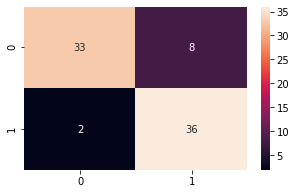

In [253]:
import seaborn as sn
matriz = confusion_matrix(classe_teste, previsoes)

plt.figure(figsize=(5, 3))
sn.heatmap(matriz, annot=True)
plt.show()

In [254]:
from sklearn.linear_model import LogisticRegression

classificador = LogisticRegression(random_state=42)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [258]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
precisao

0.8607594936708861

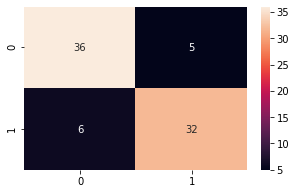

In [259]:
matriz = confusion_matrix(classe_teste, previsoes)

plt.figure(figsize=(5, 3))
sn.heatmap(matriz, annot=True)
plt.show()

In [257]:
import collections 
#Válido para compreender qual o percentual esperado de acuracidade e determinar
#qual classificador é melhor para tal problema 
print(collections.Counter(classe_teste))

Counter({0: 41, 1: 38})
